# EDA | Assignment

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("bike_details.csv")
print(df.head(10))

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

Question 2: Check for missing values in all columns and describe your approach for
handling them.

In [7]:
print(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [6]:
df.dropna(subset=['km_driven'], inplace=True)



Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.

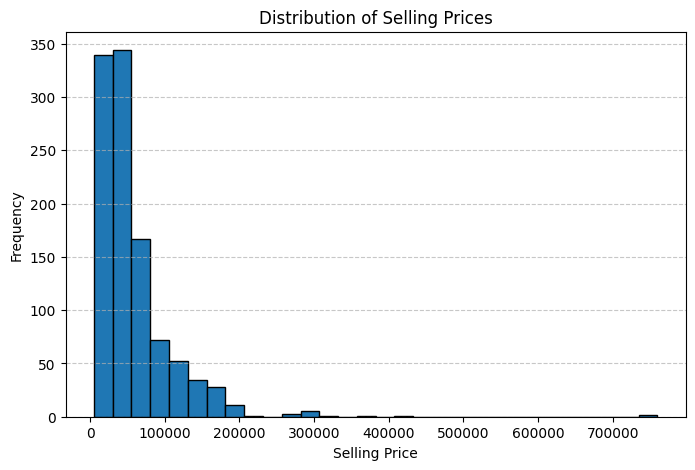

In [9]:
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The histogram of selling prices shows a right-skewed distribution.
Most bikes are sold in the lower price range, while a few have significantly higher prices, indicating the presence of some premium or luxury models in the dataset.

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.


In [10]:
avg_price = df.groupby('seller_type')['selling_price'].mean()
print(avg_price)


seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


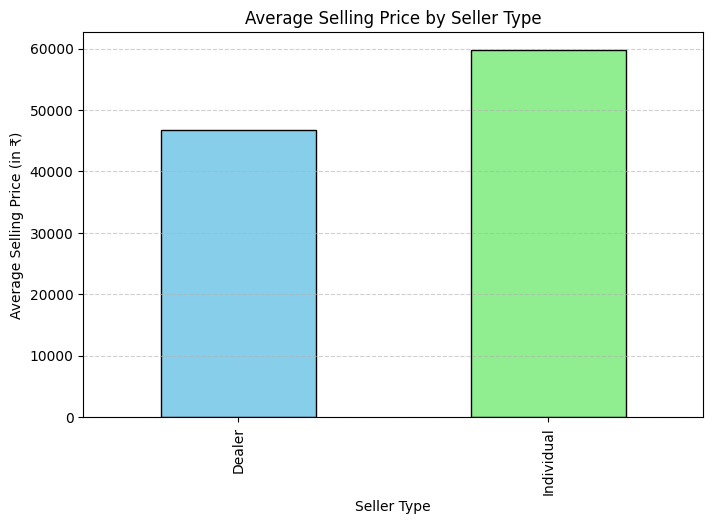

In [11]:
plt.figure(figsize=(8,5))
avg_price.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange'], edgecolor='black')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price (in ₹)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


From the bar plot, we can observe that Trustmark Dealers have the highest average selling price, followed by Dealers, while Individual sellers generally sell bikes at a lower average price.
This indicates that dealer-listed bikes are priced higher, likely because they’re in better condition or come with service guarantees.

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


In [13]:
avg_km = df.groupby('owner')['km_driven'].mean()
print(avg_km)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


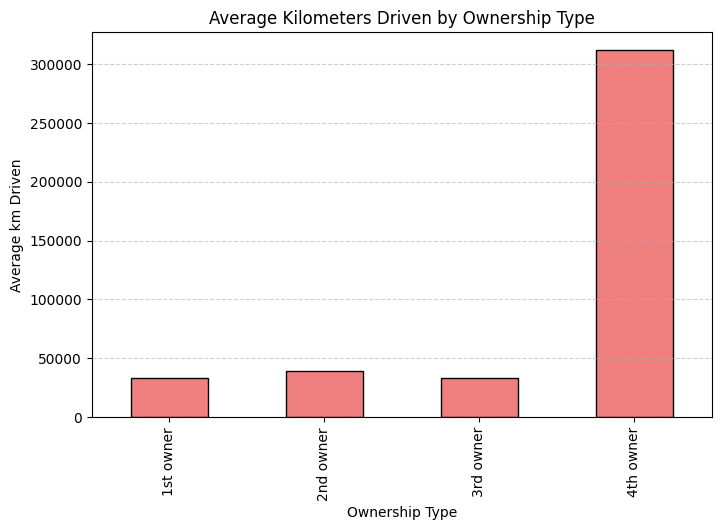

In [14]:
plt.figure(figsize=(8,5))
avg_km.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Average Kilometers Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km Driven")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.


In [15]:
print("Before Removing Outliers:")
print(df['km_driven'].describe())


Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


In [16]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]


In [17]:
print("\nAfter Removing Outliers:")
print(df_no_outliers['km_driven'].describe())



After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


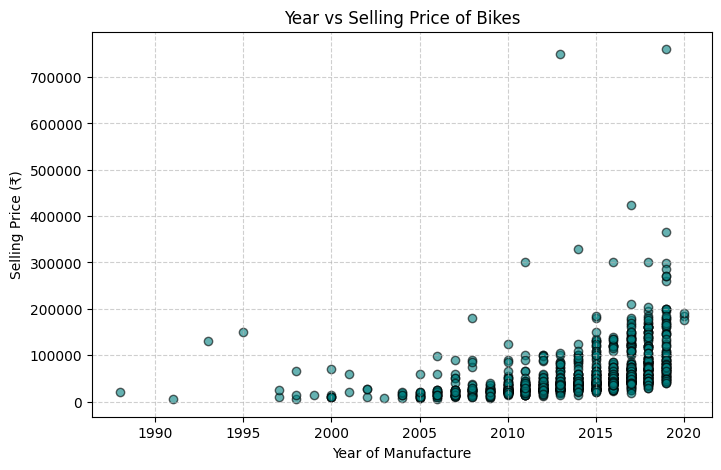

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], color='teal', alpha=0.6, edgecolors='black')
plt.title("Year vs Selling Price of Bikes")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (₹)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

In [19]:
# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

In [20]:
corr = df.corr(numeric_only=True)
print(corr)


                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


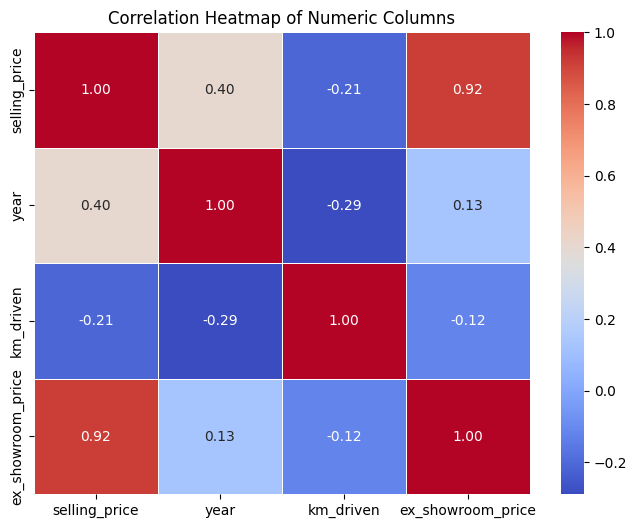

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

1. Key Factors Affecting a Bike’s Selling Price

Based on the analysis and visualizations:

Year of Manufacture:

There is a strong positive correlation between the year and selling price.

Newer bikes are generally sold at higher prices, while older bikes depreciate quickly.

Kilometers Driven (km_driven):

A negative correlation exists between kilometers driven and selling price.

More driven bikes tend to have lower resale value.

Seller Type:

Trustmark Dealers and Dealers have higher average selling prices compared to Individual sellers.

This could be due to better maintenance, warranty offers, or certification from dealers.

Engine Capacity & Power (if included):

Engine size and max power show a strong positive correlation, and both can slightly influence selling price — higher specs usually mean higher prices.

2. Data Cleaning and Preprocessing Steps

During the analysis, several data cleaning and transformation steps were performed:

Handled Missing Values:

Numerical columns (like km_driven, mileage) were filled with median values.

Categorical columns (like seller_type) were filled with mode or 'Unknown'.

Removed Outliers:

Applied the IQR method on km_driven to remove unrealistic high/low values.

This improved data consistency and made the analysis more reliable.

Feature Engineering:

One-Hot Encoding applied to seller_type to convert categorical data into numeric format.

Ensured all variables were suitable for correlation and machine learning models.

Exploratory Visualizations:

Created histograms, bar charts, scatter plots, and heatmaps to identify relationships and patterns among variables.

3. Overall Conclusion

The selling price of a bike is mainly influenced by its age (year), usage (km_driven), and seller type.
Newer, less-driven bikes from certified dealers command higher prices.
Proper data cleaning (handling missing values and outliers) and encoding were essential to reveal these patterns accurately.